In [130]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [111]:
def p(x_neig):
    if(1 in x_neig):
        x_new = 0
    else:
        x_new = int(np.random.choice([0,1],size=1))
    return x_new

In [150]:
def bintodec(x):
     return int(''.join(str(el) for  el in x.reshape(-1)),2)

In [297]:
def gibbs_sampler(p, n, n_samples = 1000, no_iter=10000,tol = 1e-2):
    
    x = np.zeros((n,n),dtype='int')
    k = 0
    x_binmap =  []
    mean_ = bintodec(x)
    mean = 1
    x_samplesmap = np.zeros(n_samples)
    samples = np.zeros((n_samples,n,n))
    
    # burn-in period
    while(abs(mean_- mean)>tol and k<no_iter):
        x_neigh = []
        i,j = np.random.randint(0,n,1)[0],np.random.randint(0,n,1)[0]
        if(k>1):
            mean_ = np.mean(x_binmap[:-1])
        if(i+1<=n-1):
            x_neigh.append(x[i+1,j])
        if(i-1>=0):
            x_neigh.append(x[i-1,j])
        if(j-1>=0):
            x_neigh.append(x[i,j-1])
        if(j+1<=n-1):
            x_neigh.append(x[i,j+1])
        
        x[i,j] = p(x_neigh)
        x_binmap.append(bintodec(x))
        mean = np.mean(x_binmap)
#         print(mean,mean_)
        k+=1
        
    burn_in = k
    print("Burn-in Steps: {}".format(burn_in))
    
    # sample collection period
    for j in range(n_samples):
        x_neigh = []
        i,j = np.random.randint(0,n,1)[0],np.random.randint(0,n,1)[0]
        
        if(i+1<=n-1):
            x_neigh.append(x[i+1,j])
        if(i-1>=0):
            x_neigh.append(x[i-1,j])
        if(j-1>=0):
            x_neigh.append(x[i,j-1])
        if(j+1<=n-1):
            x_neigh.append(x[i,j+1])
        
        x[i,j] = p(x_neigh)
        x_samplesmap[j] = (bintodec(x))
        
        samples[j] = x
    
    return burn_in,x_binmap,x_samplesmap,samples

In [331]:
n = 2
no_iter = 8000
tol = 1e-2

In [332]:
burn_in,x_binmap,x_samplesmap,samples =gibbs_sampler(p,n,no_iter=no_iter,tol=tol)

Burn-in Steps: 43


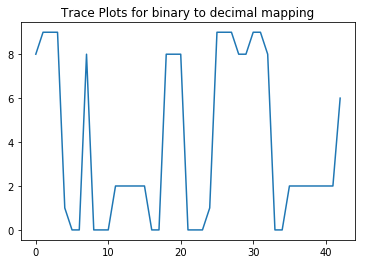

In [333]:
plt.plot(x_binmap)
plt.title("Trace Plots for binary to decimal mapping")
plt.show()

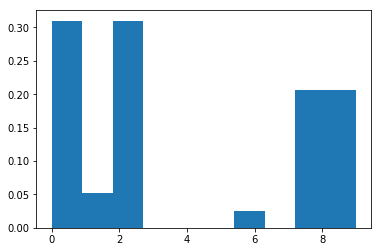

In [334]:
plt.hist(x_binmap,density=True)
plt.show()

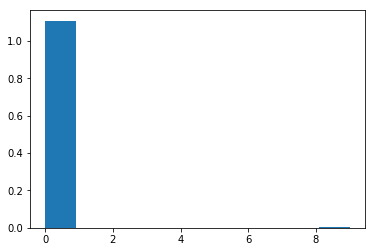

In [335]:
plt.hist(x_samplesmap,density=True)
plt.show()

In [ ]:
burns = [100,294,1003,2045,6000]
grids = [2,3,4,5,6]
tol = 1e-2
no_iter = 40000
for n in grids:
    burn_in,x_binmap,x_samplesmap,samples =gibbs_sampler(p,n,no_iter=no_iter,tol=tol)
    burns.append(burn_in)

Text(0.5,1,'Burn-in time vs grid size')

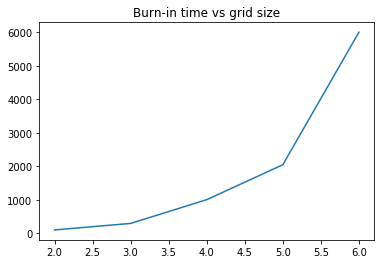

In [353]:
plt.plot(grids,burns)
plt.title("Burn-in time vs grid size")